In [1]:
import numpy as np

path = "/home/andrea/Desktop/Baseline5Prime/5.2/"

filesK1 = []
filesK3 = []
filesK6 = []
filesK9 = []

files = []

for rep in range(1, 4):
    for vm in range(1,4):
        for instance in range(1,3):
            filesK1.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K1_R'+str(rep)+'.log')
            filesK3.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K3_R'+str(rep)+'.log')
            filesK6.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K6_R'+str(rep)+'.log')
            filesK9.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K9_R'+str(rep)+'.log')
files.append(filesK1)
files.append(filesK3)
files.append(filesK6)
files.append(filesK9)

In [9]:
results = [[0 for x in range(16)] for y in range(4)]
f = 0
for key in [1,3,6,9]:
    perc25 = np.zeros(3)
    perc50 = np.zeros(3)
    perc75 = np.zeros(3)
    perc90 = np.zeros(3)
    perc99 = np.zeros(3)
    for rep in range(1, 4):
        fileToOpen = []
        for vm in range(1,4):
            for instance in range(1,3):
                fileToOpen.append([z for z in files[f] if z == path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K'+str(key)+'_R'+str(rep)+'.log'])
        
        for j in range(0, len(fileToOpen)):
            fileI = open(fileToOpen[j][0], "r")
            linesI = []
            for line in fileI:
                linesI.append(line)

            xI = np.asarray(linesI)

            k = len(xI)-2
            x = []
            while(xI[k] != "---\n"):
                a = xI[k].split(" ")
                if float(a[-1][:-1]) / 10 < 1:
                    ind = -10
                elif float(a[-1][:-1]) / 10 >= 10:
                    ind = -8
                else:
                    ind = -9
                x.append([float(a[ind]), float(a[-1][:-1])])
                k -= 1

            i = 0
            while x[i][1] > 99.0:
                i += 1
            perc99[rep-1] += ((99 - x[i-1][1])/(x[i][1] - x[i-1][1]))*x[i][0] - ((99 - x[i][1])/(x[i][1] - x[i-1][1]))*x[i-1][0]
            while x[i][1] > 90.0:
                i += 1
            perc90[rep-1] += ((90 - x[i-1][1])/(x[i][1] - x[i-1][1]))*x[i][0] - ((90 - x[i][1])/(x[i][1] - x[i-1][1]))*x[i-1][0]
            while x[i][1] > 75.0:
                i += 1
            perc75[rep-1] += ((75 - x[i-1][1])/(x[i][1] - x[i-1][1]))*x[i][0] - ((75 - x[i][1])/(x[i][1] - x[i-1][1]))*x[i-1][0]
            while x[i][1] > 50.0:
                i += 1
            perc50[rep-1] += ((50 - x[i-1][1])/(x[i][1] - x[i-1][1]))*x[i][0] - ((50 - x[i][1])/(x[i][1] - x[i-1][1]))*x[i-1][0]
            while x[i][1] > 25.0:
                i += 1
            perc25[rep-1] += ((25 - x[i-1][1])/(x[i][1] - x[i-1][1]))*x[i][0] - ((25 - x[i][1])/(x[i][1] - x[i-1][1]))*x[i-1][0]


        perc99[rep-1] = perc99[rep-1] / 6
        perc90[rep-1] = perc90[rep-1] / 6
        perc75[rep-1] = perc75[rep-1] / 6
        perc50[rep-1] = perc50[rep-1] / 6
        perc25[rep-1] = perc25[rep-1] / 6

    results[f][0] = key
    results[f][1] = perc25[0]
    results[f][2] = perc25[1]
    results[f][3] = perc25[2]
    results[f][4] = perc50[0]
    results[f][5] = perc50[1]
    results[f][6] = perc50[2]
    results[f][7] = perc75[0]
    results[f][8] = perc75[1]
    results[f][9] = perc75[2]
    results[f][10] = perc90[0]
    results[f][11] = perc90[1]
    results[f][12] = perc90[2]
    results[f][13] = perc99[0]
    results[f][14] = perc99[1]
    results[f][15] = perc99[2]
    f += 1

In [10]:
fileOutput = open("/home/andrea/Desktop/Baseline5Prime/5.2/results%.txt", "w")

In [11]:
for h in range(0, len(results)):         
    fileOutput.write("Keys: ")
    fileOutput.write(str(int(results[h][0])))
    fileOutput.write('\n25 Percentile: ')
    fileOutput.write(str(results[h][1])+ " " + str(results[h][2]) + " " + str(results[h][3]))
    fileOutput.write('\n50 Percentile: ')
    fileOutput.write(str(results[h][4])+ " " + str(results[h][5]) + " " + str(results[h][6]))
    fileOutput.write('\n75 Percentile: ')
    fileOutput.write(str(results[h][7])+ " " + str(results[h][8]) + " " + str(results[h][9]))
    fileOutput.write('\n90 Percentile: ')
    fileOutput.write(str(results[h][10])+ " " + str(results[h][11]) + " " + str(results[h][12]))
    fileOutput.write('\n99 Percentile: ')
    fileOutput.write(str(results[h][13])+ " " + str(results[h][14]) + " " + str(results[h][15]))
    fileOutput.write('\n\n')

fileOutput.close()

In [3]:
fileShard = open("/home/andrea/Desktop/Final/Baseline5Prime/5.1/results%.txt")
fileNS = open("/home/andrea/Desktop/Final/Baseline5Prime/5.2/results%.txt")

keys = np.array([1, 3, 6, 9])

perc25Shard = np.zeros(4)
errPerc25Shard = np.zeros(4)

perc50Shard = np.zeros(4)
errPerc50Shard = np.zeros(4)

perc75Shard = np.zeros(4)
errPerc75Shard = np.zeros(4)

perc90Shard = np.zeros(4)
errPerc90Shard = np.zeros(4)

perc99Shard = np.zeros(4)
errPerc99Shard = np.zeros(4)

perc25NS = np.zeros(4)
errPerc25NS = np.zeros(4)

perc50NS = np.zeros(4)
errPerc50NS = np.zeros(4)

perc75NS = np.zeros(4)
errPerc75NS = np.zeros(4)

perc90NS = np.zeros(4)
errPerc90NS = np.zeros(4)

perc99NS = np.zeros(4)
errPerc99NS = np.zeros(4)


lines = []
for line in fileShard:
    lines.append(line)
xShard = np.asarray(lines)

linesNS = []
for lineNS in fileNS:
    linesNS.append(lineNS)
xNS = np.asarray(linesNS)

j = 0
ind = 1
while ind < len(xNS)-1:
    perc25Shard[j] = np.mean([float(xShard[ind].split(" ")[2]), float(xShard[ind].split(" ")[3]), float(xShard[ind].split(" ")[4][:-1])])
    perc50Shard[j] = np.mean([float(xShard[ind+1].split(" ")[2]), float(xShard[ind+1].split(" ")[3]), float(xShard[ind+1].split(" ")[4][:-1])])
    perc75Shard[j] = np.mean([float(xShard[ind+2].split(" ")[2]), float(xShard[ind+2].split(" ")[3]), float(xShard[ind+2].split(" ")[4][:-1])])
    perc90Shard[j] = np.mean([float(xShard[ind+3].split(" ")[2]), float(xShard[ind+3].split(" ")[3]), float(xShard[ind+3].split(" ")[4][:-1])])
    perc99Shard[j] = np.mean([float(xShard[ind+4].split(" ")[2]), float(xShard[ind+4].split(" ")[3]), float(xShard[ind+4].split(" ")[4][:-1])])

    errPerc25Shard[j] = np.std([float(xShard[ind].split(" ")[2]), float(xShard[ind].split(" ")[3]), float(xShard[ind].split(" ")[4][:-1])])
    errPerc50Shard[j] = np.std([float(xShard[ind+1].split(" ")[2]), float(xShard[ind+1].split(" ")[3]), float(xShard[ind+1].split(" ")[4][:-1])])
    errPerc75Shard[j] = np.std([float(xShard[ind+2].split(" ")[2]), float(xShard[ind+2].split(" ")[3]), float(xShard[ind+2].split(" ")[4][:-1])])
    errPerc90Shard[j] = np.std([float(xShard[ind+3].split(" ")[2]), float(xShard[ind+3].split(" ")[3]), float(xShard[ind+3].split(" ")[4][:-1])])
    errPerc99Shard[j] = np.std([float(xShard[ind+4].split(" ")[2]), float(xShard[ind+4].split(" ")[3]), float(xShard[ind+4].split(" ")[4][:-1])])

    perc25NS[j] = np.mean([float(xNS[ind].split(" ")[2]), float(xNS[ind].split(" ")[3]), float(xNS[ind].split(" ")[4][:-1])])
    perc50NS[j] = np.mean([float(xNS[ind+1].split(" ")[2]), float(xNS[ind+1].split(" ")[3]), float(xNS[ind+1].split(" ")[4][:-1])])
    perc75NS[j] = np.mean([float(xNS[ind+2].split(" ")[2]), float(xNS[ind+2].split(" ")[3]), float(xNS[ind+2].split(" ")[4][:-1])])
    perc90NS[j] = np.mean([float(xNS[ind+3].split(" ")[2]), float(xNS[ind+3].split(" ")[3]), float(xNS[ind+3].split(" ")[4][:-1])])
    perc99NS[j] = np.mean([float(xNS[ind+4].split(" ")[2]), float(xNS[ind+4].split(" ")[3]), float(xNS[ind+4].split(" ")[4][:-1])])

    errPerc25NS[j] = np.std([float(xNS[ind].split(" ")[2]), float(xNS[ind].split(" ")[3]), float(xNS[ind].split(" ")[4][:-1])])
    errPerc50NS[j] = np.std([float(xNS[ind+1].split(" ")[2]), float(xNS[ind+1].split(" ")[3]), float(xNS[ind+1].split(" ")[4][:-1])])
    errPerc75NS[j] = np.std([float(xNS[ind+2].split(" ")[2]), float(xNS[ind+2].split(" ")[3]), float(xNS[ind+2].split(" ")[4][:-1])])
    errPerc90NS[j] = np.std([float(xNS[ind+3].split(" ")[2]), float(xNS[ind+3].split(" ")[3]), float(xNS[ind+3].split(" ")[4][:-1])])
    errPerc99NS[j] = np.std([float(xNS[ind+4].split(" ")[2]), float(xNS[ind+4].split(" ")[3]), float(xNS[ind+4].split(" ")[4][:-1])])

    j += 1
    ind += 7

In [4]:
import matplotlib.pyplot as plt

In [13]:
plt.figure(figsize=(17, 15))
width = 0.7
margin = 0.05
plt.title('Response Time Percentiles [Sharding on the Left, Non Sharding on the Right]', fontsize= 25)
plt.xlabel("Number of Keys in a multi-get Request", fontsize= 20)
plt.yticks(fontsize=20)
plt.ylabel("Response Time [msec]", fontsize= 20)
rect99Shard = plt.bar(keys-margin, perc99Shard, width, yerr=errPerc99Shard, tick_label=keys, ecolor='darkslategrey', color='lightslategrey', capsize=4, label="99th Percentile")
rect90Shard = plt.bar(keys-margin, perc90Shard, width, yerr=errPerc90Shard, tick_label=keys, ecolor='indigo', color='plum', capsize=4, label="90th Percentile")
rect75Shard = plt.bar(keys-margin, perc75Shard, width, yerr=errPerc75Shard, tick_label=keys, ecolor='darkgreen', color='lightgreen', capsize=4, label="75th Percentile")
rect50Shard = plt.bar(keys-margin, perc50Shard, width, yerr=errPerc50Shard, tick_label=keys, ecolor='maroon', color='lightsalmon', capsize=4, label="50th Percentile")
rect25Shard = plt.bar(keys-margin, perc25Shard, width, yerr=errPerc25Shard, tick_label=keys, ecolor='blue', color='lightblue', capsize=4, label="25th Percentile")
rect99NS = plt.bar(keys+width+margin, perc99NS, width, yerr=errPerc99NS, tick_label=keys, ecolor='darkslategrey', color='lightslategrey',capsize=4)
rect90NS = plt.bar(keys+width+margin, perc90NS, width, yerr=errPerc90NS, tick_label=keys, ecolor='indigo', color='plum', capsize=4)
rect75NS = plt.bar(keys+width+margin, perc75NS, width, yerr=errPerc75NS, tick_label=keys, ecolor='darkgreen', color='lightgreen', capsize=4)
rect50NS = plt.bar(keys+width+margin, perc50NS, width, yerr=errPerc50NS, tick_label=keys, ecolor='maroon', color='lightsalmon', capsize=4)
rect25NS = plt.bar(keys+width+margin, perc25NS, width, yerr=errPerc25NS, tick_label=keys, ecolor='blue', color='lightblue', capsize=4)

plt.legend(loc=2, fontsize='xx-large')
plt.xticks(keys + width / 2, fontsize = 20)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%.3f' % float(height), ha='center', va='bottom', fontsize=20)

autolabel(rect99Shard)
autolabel(rect90Shard)
autolabel(rect75Shard)
autolabel(rect50Shard)
autolabel(rect25Shard)
autolabel(rect99NS)
autolabel(rect90NS)
autolabel(rect75NS)
autolabel(rect50NS)
autolabel(rect25NS)


In [14]:
plt.savefig("/home/andrea/Desktop/Final/Baseline5Prime/Percentiles.png")

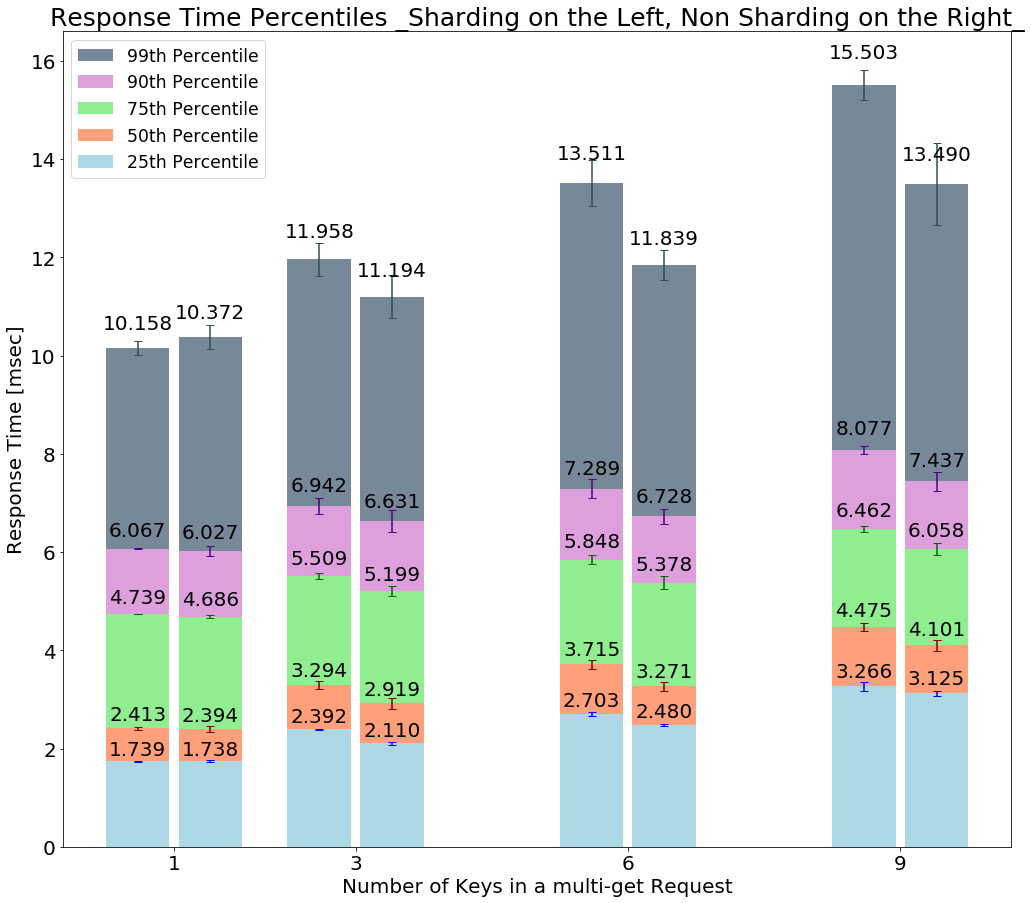

In [12]:
plt.show()